In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

In [48]:
x_train, y_train = load_data()

In [49]:
print(x_train)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [50]:
print(y_train)

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


In [35]:
def cost (x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f=w*x[i]+b
        cost=cost+(f-y[i])**2
    total_cost=cost/(2*m)
    return total_cost

In [36]:
def descent(x,y,w,b):
    m = x.shape[0]
    dw=0
    db=0
    for i in range(m):
        f=w*x[i]+b
        dw+=(f-y[i])*x[i]
        db+=f-y[i]
    dwj=dw/m
    dbj=db/m
    return dwj,dbj

In [37]:
def gradient(x, y, a, max_iters):
    J_history=[]
    p_history=[]
    w, b = 0, 0 
    for i in range(max_iters):
        dwj, dwb = descent(x, y, w, b)
        temp_w = w - (a * dwj)
        temp_b = b - (a * dwb)
        w, b = temp_w, temp_b 
        if i < 100_000:  # prevent resource exhaustion  
            J_history.append(cost(x, y, w, b))  
            p_history.append([w, b]) 
            
        if i% math.ceil(max_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ", # 0.2e means till 2 decimal places
                  f"dwj: {dwj: 0.3e}, dwb: {dwb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
       
    return w, b, J_history, p_history

In [44]:
a=0.0001  
m=100000
#x_train = (x_train - np.mean(x_train)) / np.std(x_train)
#y_train = (y_train - np.mean(y_train)) / np.std(y_train)
w,b,j,p = gradient(x_train ,y_train,a,m)
print(w,b)

Iteration    0: Cost 3.16e+01  dwj: -6.533e+01, dwb: -5.839e+00   w:  6.533e-03, b: 5.83914e-04
Iteration 10000: Cost 5.48e+00  dwj: -6.012e-02, dwb:  5.984e-01   w:  8.595e-01, b:-5.76082e-01
Iteration 20000: Cost 5.18e+00  dwj: -5.020e-02, dwb:  4.997e-01   w:  9.145e-01, b:-1.12366e+00
Iteration 30000: Cost 4.96e+00  dwj: -4.192e-02, dwb:  4.173e-01   w:  9.605e-01, b:-1.58091e+00
Iteration 40000: Cost 4.82e+00  dwj: -3.501e-02, dwb:  3.485e-01   w:  9.988e-01, b:-1.96275e+00
Iteration 50000: Cost 4.71e+00  dwj: -2.923e-02, dwb:  2.910e-01   w:  1.031e+00, b:-2.28160e+00
Iteration 60000: Cost 4.64e+00  dwj: -2.441e-02, dwb:  2.430e-01   w:  1.058e+00, b:-2.54785e+00
Iteration 70000: Cost 4.59e+00  dwj: -2.038e-02, dwb:  2.029e-01   w:  1.080e+00, b:-2.77019e+00
Iteration 80000: Cost 4.56e+00  dwj: -1.702e-02, dwb:  1.694e-01   w:  1.099e+00, b:-2.95585e+00
Iteration 90000: Cost 4.53e+00  dwj: -1.421e-02, dwb:  1.415e-01   w:  1.114e+00, b:-3.11089e+00
1.127188251397627 -3.2403474942

Enter city population in 10^4 terms 3.5


Profit/Loss predicted:  7048.113856019369


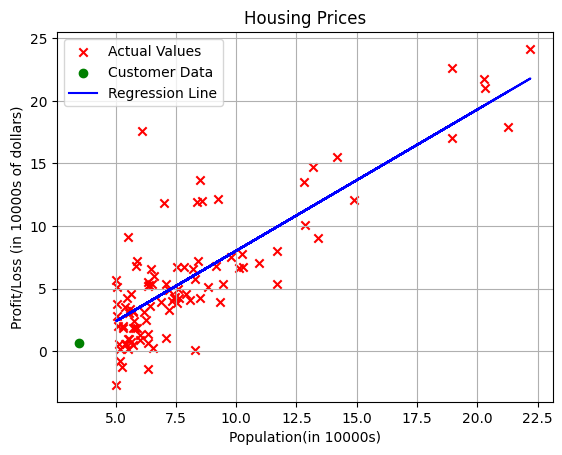

In [53]:
y_pred=(w*x_train)+b
#y_pred_original_scale = y_pred * np.std(y_trai) + np.mean(y_trai)
size=float(input("Enter city population in 10^4 terms"))
#size_scale=(size - np.mean(x_train)) / np.std(x_train)
price=(w*size)+b
#price_actual=price * np.std(y_train) + np.mean(y_train)
print("Profit/Loss predicted: ",price*10000)

plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.scatter(size,price,marker='o',c='g',label="Customer Data")
plt.plot(x_train, y_pred, c='b', label="Regression Line")
plt.title("Housing Prices")
plt.ylabel('Profit/Loss (in 10000s of dollars)')
plt.xlabel('Population(in 10000s)')
plt.grid()
plt.legend()
plt.show()